In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as graph
from Helpers.pandasTools import load_transposed_pvcf
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, SpectralClustering
from mpl_toolkits.mplot3d import Axes3D

graph.style.use('fivethirtyeight')

/home/harshil/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/harshil/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
df = load_transposed_pvcf('/data4/transposed-merged-925-R2-filtered-0.0af-0.05missing-1step.pvcf',
                         delimiter='\t', header=4)
df.head()

Loading...: 100%|██████████| 929/929 [03:21<00:00,  4.61it/s]


,0,1,2,3,4,5,6,7,8,9,...,428351,428352,428353,428354,428355,428356,428357,428358,428359,428360
1002,1.000000,NaN,0.986301,1.0,1.0,1.0,1.0000,1.0,1.0,1.000000,...,1.000000,0.905172,0.875000,1.000000,1.000000,1.000000,0.672414,1.000000,1.0,1.0
1003,0.894737,0.651163,1.000000,1.0,1.0,1.0,0.9875,1.0,1.0,0.987654,...,1.000000,0.777778,0.909091,0.965517,NaN,1.000000,0.913043,0.890625,1.0,1.0
1004,0.946429,0.927536,1.000000,1.0,1.0,1.0,1.0000,1.0,1.0,1.000000,...,1.000000,0.912621,0.758621,1.000000,0.985294,1.000000,1.000000,1.000000,1.0,1.0
1005,1.000000,0.625000,1.000000,1.0,1.0,1.0,1.0000,1.0,1.0,1.000000,...,0.730769,0.750000,NaN,1.000000,1.000000,0.987179,0.807692,0.928571,1.0,1.0
1006,0.964286,0.468750,1.000000,1.0,1.0,1.0,1.0000,1.0,1.0,0.991736,...,1.000000,NaN,0.341463,1.000000,0.988636,1.000000,0.948052,0.957895,1.0,1.0


In [4]:
df.fillna(df.mean(), inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,428351,428352,428353,428354,428355,428356,428357,428358,428359,428360
1002,1.000000,0.696263,0.986301,1.0,1.0,1.0,1.0000,1.0,1.0,1.000000,...,1.000000,0.905172,0.875000,1.000000,1.000000,1.000000,0.672414,1.000000,1.0,1.0
1003,0.894737,0.651163,1.000000,1.0,1.0,1.0,0.9875,1.0,1.0,0.987654,...,1.000000,0.777778,0.909091,0.965517,0.998263,1.000000,0.913043,0.890625,1.0,1.0
1004,0.946429,0.927536,1.000000,1.0,1.0,1.0,1.0000,1.0,1.0,1.000000,...,1.000000,0.912621,0.758621,1.000000,0.985294,1.000000,1.000000,1.000000,1.0,1.0
1005,1.000000,0.625000,1.000000,1.0,1.0,1.0,1.0000,1.0,1.0,1.000000,...,0.730769,0.750000,0.691985,1.000000,1.000000,0.987179,0.807692,0.928571,1.0,1.0
1006,0.964286,0.468750,1.000000,1.0,1.0,1.0,1.0000,1.0,1.0,0.991736,...,1.000000,0.806019,0.341463,1.000000,0.988636,1.000000,0.948052,0.957895,1.0,1.0


In [5]:
# Dimensionality reduction
pca = PCA().fit(df)
transformed_pca = pca.transform(df)

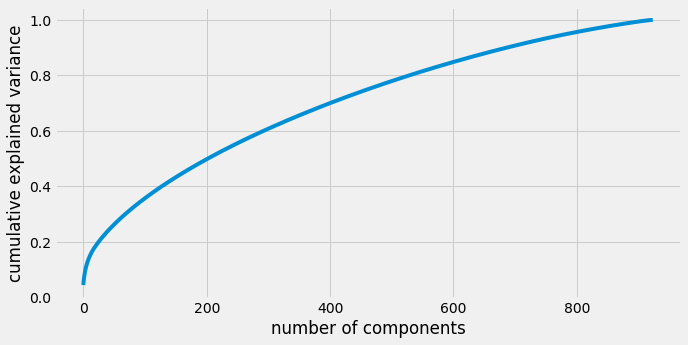

In [6]:
# Plot explained variance per axis
graph.figure(figsize=(10, 5))
graph.plot(np.cumsum(pca.explained_variance_ratio_))
graph.xlabel('number of components')
graph.ylabel('cumulative explained variance');
graph.show()

In [7]:
pca_128 = transformed_pca[:, :128]

print("original shape:   ", df.shape)
print("transformed shape:", pca_128.shape)

original shape:    (924, 428361)
transformed shape: (924, 128)


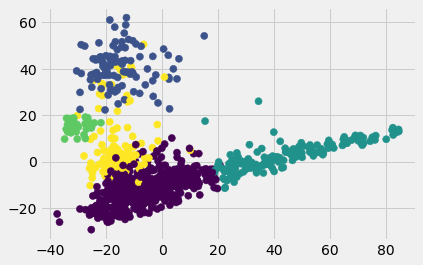

In [8]:
# Cluster 
pca_x = pca_128

kmeans = KMeans(n_clusters=5)
kmeans.fit(pca_x)
y_kmeans = kmeans.predict(pca_x)

graph.scatter(pca_x[:, 0], pca_x[:, 1], c=y_kmeans, s=50, cmap='viridis')
graph.show()

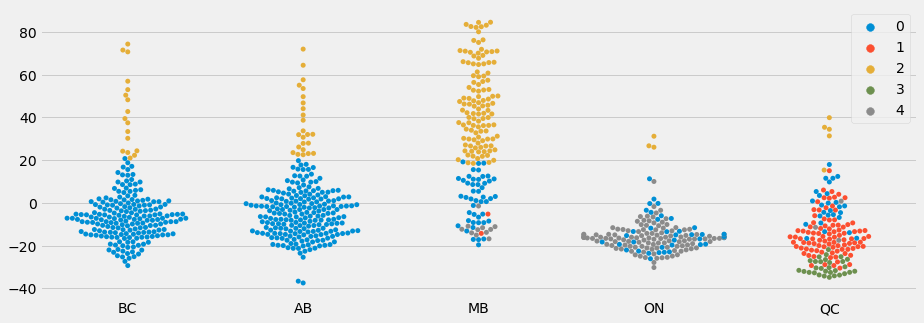

In [9]:
provinces = {1: 'BC', 2: 'AB', 3: 'MB', 4: 'ON', 5: 'QC'}
location = np.array([provinces[int(col[0])] for col in df.index])

graph.figure(figsize=(14, 5))
sns.swarmplot(x=location, y=pca_x[:, 0], hue=y_kmeans, size=5)
graph.show()

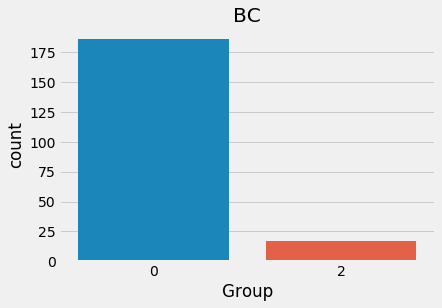

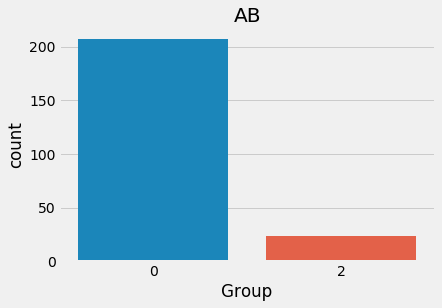

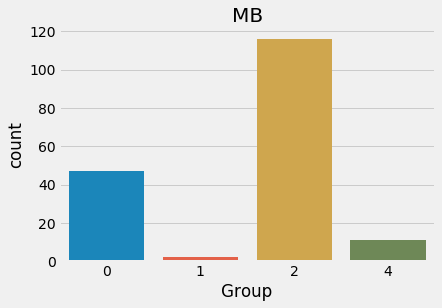

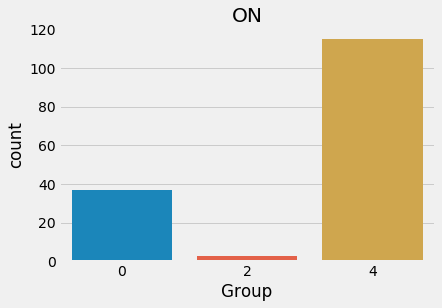

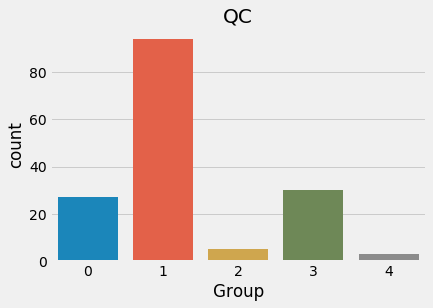

In [10]:
for province in provinces.values():
    sns.countplot(y_kmeans[location == province])
    graph.title(province)
    graph.xlabel('Group')
    graph.show()

/home/harshil/.local/lib/python3.6/site-packages/sklearn/cluster/spectral.py:442: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"
/home/harshil/.local/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


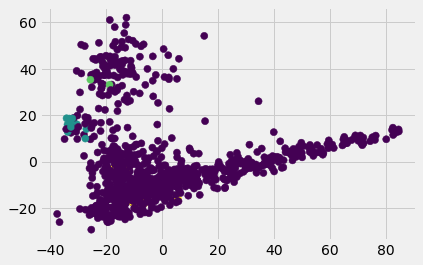

In [11]:
model = SpectralClustering(n_clusters=5, affinity='nearest_neighbors',
                           n_neighbors=3, assign_labels='kmeans')
labels = model.fit_predict(transformed_pca)
graph.scatter(transformed_pca[:, 0], transformed_pca[:, 1], c=labels,
            s=50, cmap='viridis');
graph.show()